# Виконала студентка ІП-13 Лисенко Анастасія

# Додаткове завдання
## Завдання 1
1. Завантажити карту України  Ukraine.jpg
2. Розмістити бульбашки, що відповідають їх населенню, на довільних 5 містах (статистику взяти в інтернеті)
3. Знайти найбільшу відстань між містами в пікселях та кілометрах
## Завдання 3
1. Завантажити shape-файл с областями України.
2. Побудувати картограми для прибутку населення на 1 особу і ВВП по регіонам за 2016 рік.
3. По даним за 2006-2015 роки для кожного регіону розрахувати коефіцієнт кореляції між прибутком населення на 1 особу та ВВП.  Відобразити на картограмі.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Знаходимо координати основних міст та їх населення.

In [2]:
cities = ['Київ', 'Черкаси', 'Луганськ', 'Миколаїв', 'Івано-Франківськ']
cities_coords = np.array([(386, 145), (458, 220), (788, 275), (453, 380), (122, 253)])
cities_population = np.array([2884, 270, 410, 486, 230])

Розміщуємо бульбашки на містах, які ми вибрали у минулому пункті. Радіус бульбашки пов'язаний з к-стю населення.

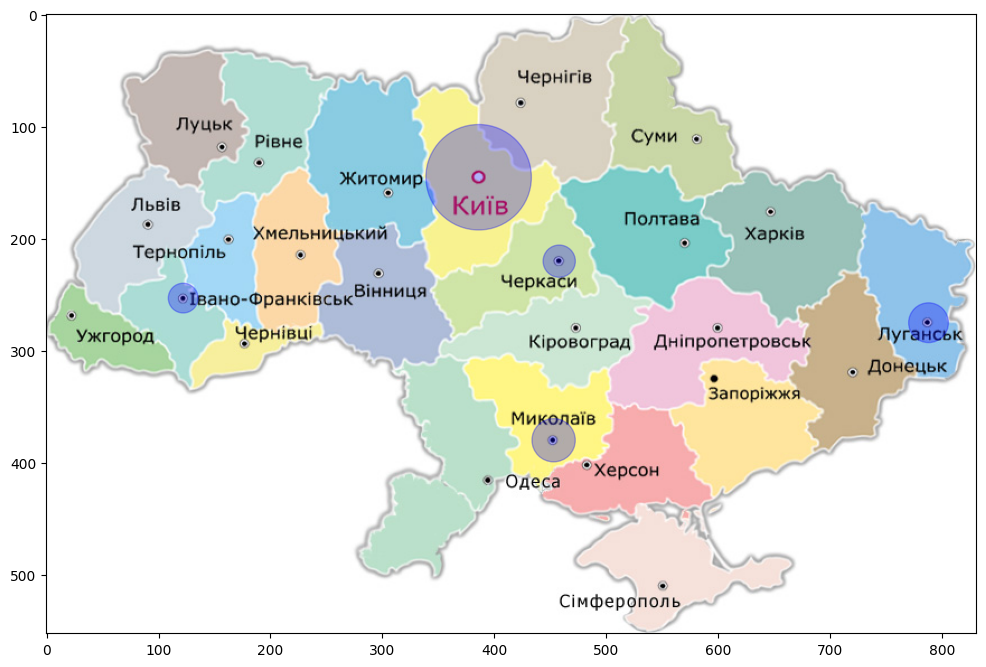

In [3]:
map_img = mpimg.imread('data/Ukraine.jpg')

fig, ax = plt.subplots(figsize=(12, 12))

ax.imshow(map_img)
ax.scatter(
    cities_coords[:, 0],
    cities_coords[:, 1],
    s=cities_population * 2,
    c='blue',
    alpha=0.3,
    linewidth=1
)
plt.show()

Цей код використовує бібліотеку scipy для розрахунку евклідової відстані між координатами міст cities_coords. Наступним кроком визначається відстань між двома найвіддаленішими містами за допомогою функції argmax() та методу unravel_index(). За допомогою відстані в пікселях та розмірів карти в пікселях map_img.shape[0], відстань між містами перераховується в кілометрах.
Наступним кроком код візуалізує карту та мітки міст, розмір яких відображає населення міста. Також на графіку показується лінія між двома найвіддаленішими містами, а також вказується відстань в пікселях та кілометрах між цими містами. Нарешті, код виводить рядок, що містить інформацію про найвіддаленіші міста та відстань між ними в пікселях та кілометрах.

The max distance is between Луганськ and Івано-Франківськ and It is 666.36 pixels.
The max distance is between Луганськ and Івано-Франківськ and It is 1076.06 km.


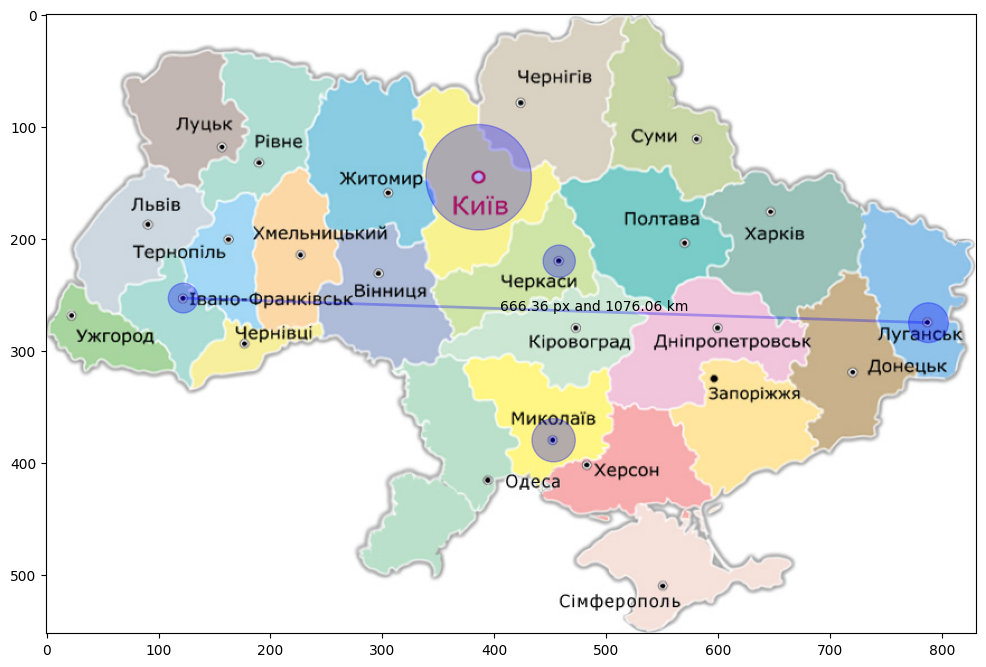

In [4]:
from scipy.spatial import distance

distances = distance.cdist(cities_coords, cities_coords, 'euclidean')
city_1, city_2 = np.unravel_index(distances.argmax(), distances.shape)

pixel_distance = distances[city_1, city_2]

ukr_length_km = 893
km_distance = (ukr_length_km/map_img.shape[0])*pixel_distance

fig, ax = plt.subplots(figsize=(12, 12))

ax.imshow(map_img)
ax.scatter(
    cities_coords[:, 0],
    cities_coords[:, 1],
    s=cities_population * 2,
    c='blue',
    alpha=0.3,
    linewidth=1
)

city1_coords = cities_coords[city_1]
city2_coords = cities_coords[city_2]

ax.plot(
    [city1_coords[0], city2_coords[0]],
    [city1_coords[1], city2_coords[1]],
    c='blue',
    alpha=0.3,
    linewidth=2
)

ax.annotate(
    '{:.2f}'.format(pixel_distance) + ' px and ' + '{:.2f}'.format(km_distance) + ' km',
    xy=((city1_coords[0] + city1_coords[1])/2, (city2_coords[0] + city2_coords[1])/2),
    xytext=((city1_coords[0] + city2_coords[0])/2-50, (city1_coords[1] + city2_coords[1])/2),
    fontsize=10, 
    c='black'
)

print(f"The max distance is between {cities[city_1]} and {cities[city_2]} and It is {'{:.2f}'.format(pixel_distance)} pixels.")
print(f"The max distance is between {cities[city_1]} and {cities[city_2]} and It is {'{:.2f}'.format(km_distance)} km.")

plt.show()

In [5]:
!pip install pandas

In [6]:
import geopandas as gpd
import pandas as pd

Перша змінна map_shape містить геопросторові дані про форму та розташування областей України з файлу 'data/UKR_ADM1.shp', який містить інформацію про політичний поділ України на рівні областей.

Друга змінна ukr_gdp_data_frame містить дані про ВВП України за роки з файлу 'data/ukr_GDP.csv'.

Третя змінна ukr_dpp_data_frame містить дані про ДВП України за роки з файлу 'data/ukr_DPP.csv'.

In [7]:
map_shape = gpd.read_file('data/UKR_ADM1.shp')
ukr_gdp_data_frame = pd.read_csv('data/ukr_GDP.csv', sep=";", decimal=",", encoding="windows-1251", header=1)
ukr_dpp_data_frame = pd.read_csv('data/ukr_DPP.csv', sep=";", decimal=",", encoding="windows-1251", header=1)

Аналізую дані у створених ДатаФреймах

In [8]:
print("Data format for gdp:")
print(ukr_gdp_data_frame.head(10))

print("Data format for dpp:")
print(ukr_dpp_data_frame.head(10))

Data format for gdp:
                            Name                    UKRname  2006  2007  2008  \
0  Autonomous Republic of Crimea  Автономна Республіка Крим   NaN   NaN   NaN   
1               Vinnytsia Oblast                  Вінницька   NaN   NaN   NaN   
2                   Volyn Oblast                  Волинська   NaN   NaN   NaN   
3          Dnipropetrovsk Oblast           Дніпропетровська   NaN   NaN   NaN   
4                 Donetsk Oblast                   Донецька   NaN   NaN   NaN   
5                Zhytomyr Oblast                Житомирська   NaN   NaN   NaN   
6             Zakarpattia Oblast               Закарпатська   NaN   NaN   NaN   
7              Zaporizhia Oblast                 Запорізька   NaN   NaN   NaN   
8         Ivano-Frankivsk Oblast          Івано-Франківська   NaN   NaN   NaN   
9                    Kyiv Oblast                   Київська   NaN   NaN   NaN   

   2009  2010  2011    2012    2013      2014      2015      2016  
0   NaN   NaN   NaN

In [9]:
ukr_gdp_geo_data_frame = gpd.GeoDataFrame(pd.merge(map_shape, ukr_gdp_data_frame))
ukr_dpp_geo_data_frame = gpd.GeoDataFrame(pd.merge(map_shape, ukr_dpp_data_frame))

У цьому коді створена функція show_map(), яка приймає два аргументи: geo_frame - геопросторовий фрейм даних, що містить інформацію про території, які потрібно відобразити на мапі та column - назву стовпця даних, значення якого використовуються для забарвлення територій на мапі.

У функції використовується метод plot() геопросторового фрейму даних з бібліотеки geopandas. В параметрах методу вказується назва стовпця, значення якого використовуються для забарвлення територій на мапі. Також вказується розмір мапи, наявність легенди та параметри для обробки пропущених значень. Після цього мапа відображається за допомогою функції plt.show().

Два рази викликається ця функція, передаючи в неї дані про ВВП та ДВП України за 2016 рік з відповідних геопросторових фреймів даних ukr_gdp_geo_data_frame та ukr_dpp_geo_data_frame відповідно.

D:\DA\LAB_4\.venv\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


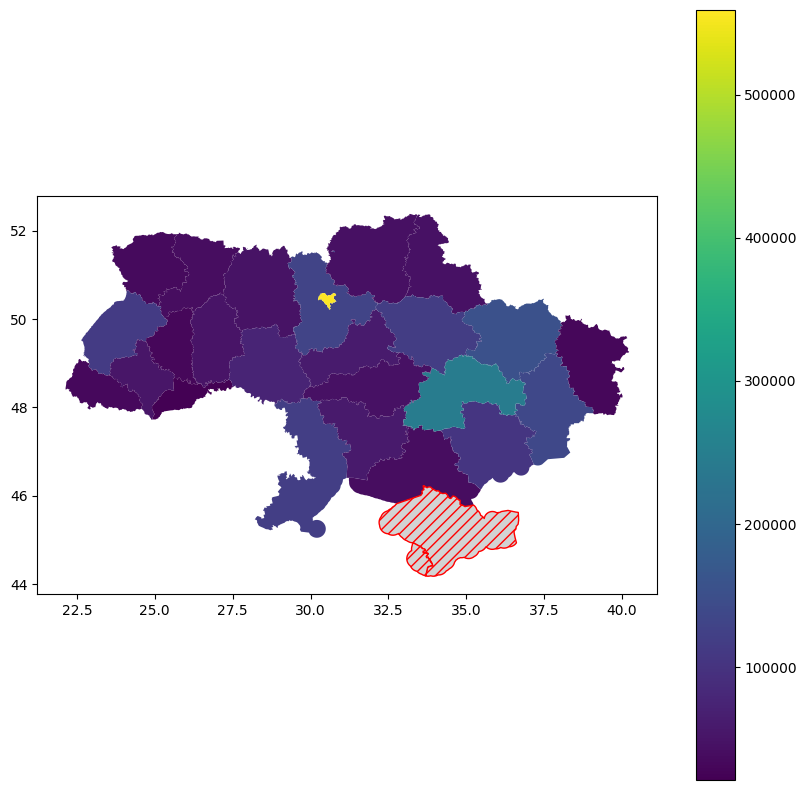

D:\DA\LAB_4\.venv\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


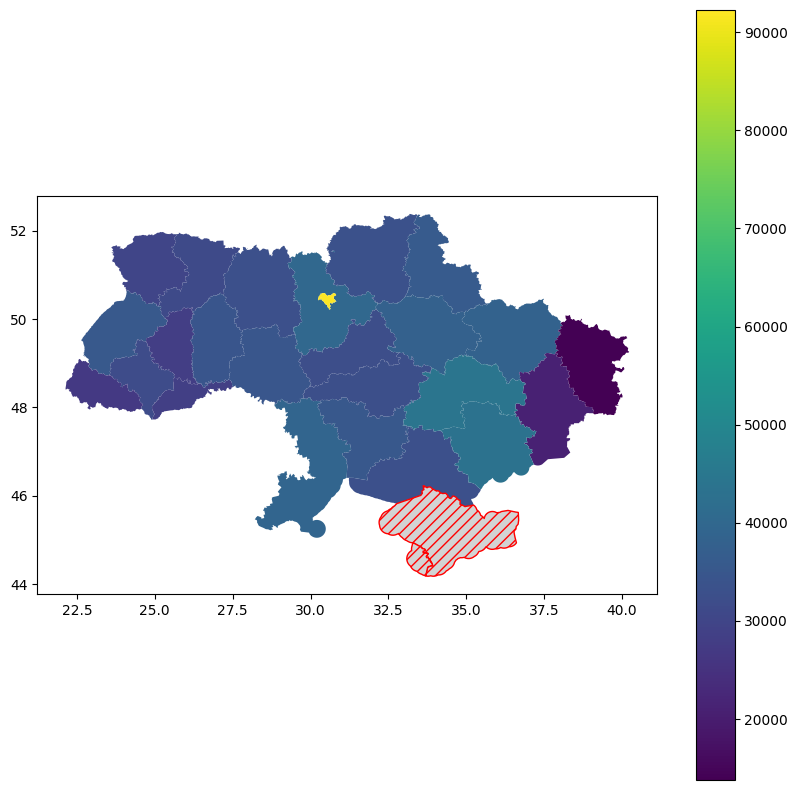

In [10]:
def show_map(geo_frame, column):
    geo_frame.plot(column=column, legend=True, figsize=(10, 10), missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values"
    })
    plt.show()


show_map(ukr_gdp_geo_data_frame, "2016")
show_map(ukr_dpp_geo_data_frame, "2016")

У цьому коді створена функція get_correlation_coefficients(), яка приймає три аргументи: first_dataset та second_dataset - два датасети, для яких треба порахувати коефіцієнти кореляції та geo_frame - геопросторовий фрейм даних, що містить інформацію про території, які потрібно відобразити на мапі.

У функції використовується метод corrwith() бібліотеки pandas, який повертає коефіцієнти кореляції між стовпцями двох датасетів. Результат записується до нового датасету correlations, де стовпець Correlation містить значення коефіцієнтів кореляції, а стовпець Name - назви територій, до яких відносяться ці значення.

Далі виконується злиття цього датасету з геопросторовим фреймом даних geo_frame за назвою територій. Результат зберігається в змінну correlations_map.

На виході функція повертає два значення: correlations - датасет з коефіцієнтами кореляції та назвами територій та correlations_map - геопросторовий фрейм даних зі значеннями коефіцієнтів кореляції та назвами територій для відображення на мапі.

In [11]:
def get_correlation_coefficients(
    first_dataset,
    second_dataset,
    geo_frame):
    correlations = pd.DataFrame()
    correlations['Correlation'] = first_dataset.corrwith(second_dataset, axis=1)
    correlations['Name'] = first_dataset['Name']

    correlations_map = pd.merge(geo_frame, correlations, on=['Name'])

    return correlations, correlations_map

correlations, correlations_map = get_correlation_coefficients(
    ukr_dpp_data_frame,
    ukr_gdp_data_frame,
    map_shape)

Виводимо дані ДатаФрейму та Картограму коефіцієнту кореляції.

Data format for correlations:
   Correlation                           Name
0     1.000000  Autonomous Republic of Crimea
1     0.988787               Vinnytsia Oblast
2     0.971714                   Volyn Oblast
3     0.993466          Dnipropetrovsk Oblast
4     0.761617                 Donetsk Oblast
5     0.990027                Zhytomyr Oblast
6     0.960397             Zakarpattia Oblast
7     0.986106              Zaporizhia Oblast
8     0.958761         Ivano-Frankivsk Oblast
9     0.995409                    Kyiv Oblast


D:\DA\LAB_4\.venv\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


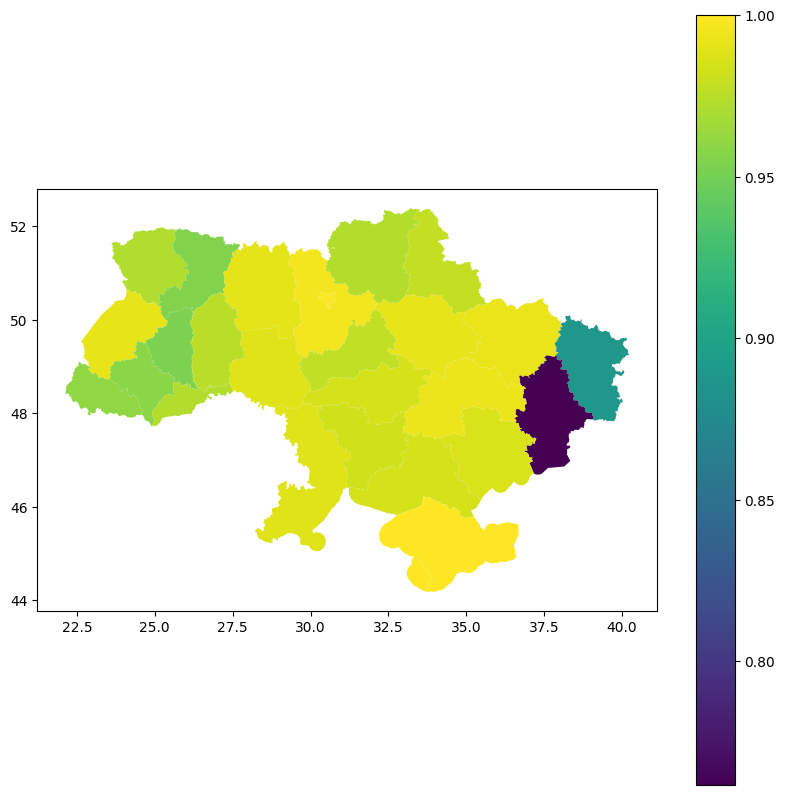

In [12]:
print("Data format for correlations:")
print(correlations.head(10))

show_map(correlations_map, "Correlation")
